First Output:

Dataset Loaded Successfully
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Second Output:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies              

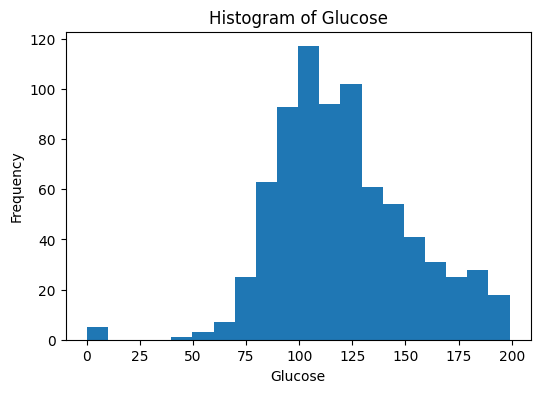

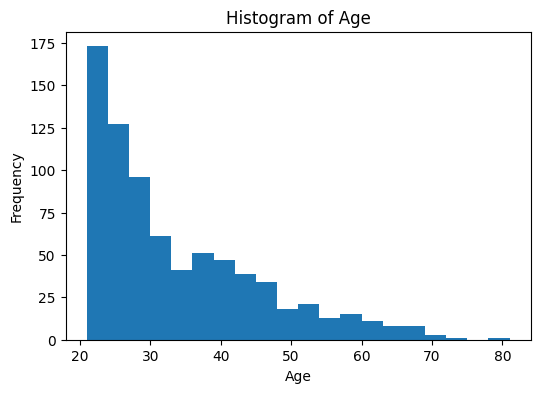


Third(a) Output: Glucose Column
   Glucose
0      148
1       85
2      183
3       89
4      137

Third(b) Output: BMI and Age Columns
    BMI  Age
0  33.6   50
1  26.6   31
2  23.3   32
3  28.1   21
4  43.1   33

Third(c) Output: Outcome and Insulin Columns
   Outcome  Insulin
0        1        0
1        0        0
2        1        0
3        0       94
4        1      168

Fourth Output: Missing Data Handled
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Fifth Output:
X and y created successfully

Sixth Output:
Train-Test Split Done
Train size: 537
Test size: 231

Seventh Output:
KNN Functions Created Successfully


/tmp/ipython-input-3856132633.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)



Eighth Output:
Accuracy: 0.7056277056277056


In [6]:
# Task (3.1) (1) – Diabetes Dataset
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

''' 1. Load dataset '''
df = pd.read_csv("diabetes_.csv")
print("First Output:\n")
print("Dataset Loaded Successfully")
print(df.head())

''' 2. Inspect DataFrame '''
print("\nSecond Output:")
print(df.info())

# >>> Added Graphs here (simple + clean) <<<

# (a) Glucose Histogram
plt.figure(figsize=(6,4))
plt.hist(df['Glucose'], bins=20)
plt.title("Histogram of Glucose")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()

# (b) Age Histogram
plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=20)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


''' 3. Create DataFrames for specific columns '''

# (a) Glucose column
glucose = df[['Glucose']]
print("\nThird(a) Output: Glucose Column")
print(glucose.head())

# (b) BMI and Age columns
bmi_age = df[['BMI', 'Age']]
print("\nThird(b) Output: BMI and Age Columns")
print(bmi_age.head())

# (c) Outcome and Insulin columns
outcome_insulin = df[['Outcome', 'Insulin']]
print("\nThird(c) Output: Outcome and Insulin Columns")
print(outcome_insulin.head())


''' 4. Handle Missing Data '''
# Replace 0 with NaN and fill with mean
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for col in cols:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].mean(), inplace=True)

print("\nFourth Output: Missing Data Handled")
print(df.isnull().sum())


''' 5. Feature Matrix & Target '''
X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values

print("\nFifth Output:")
print("X and y created successfully")


''' 6. Train-Test Split (70/30) FROM SCRATCH '''
np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(0.7 * len(X))

train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

print("\nSixth Output:")
print("Train-Test Split Done")
print("Train size:", len(X_train))
print("Test size:", len(X_test))


''' 7. KNN IMPLEMENTATION FROM SCRATCH '''

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict_single(x):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(x, X_train[i])
        distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:5]
    labels = [label for (_, label) in k_nearest]
    return Counter(labels).most_common(1)[0][0]

def knn_predict(X_test):
    preds = []
    for row in X_test:
        preds.append(knn_predict_single(row))
    return np.array(preds)

print("\nSeventh Output:")
print("KNN Functions Created Successfully")


''' 8. Evaluate Accuracy '''
y_pred = knn_predict(X_test)
accuracy = np.mean(y_pred == y_test)

print("\nEighth Output:")
print("Accuracy:", accuracy)


First Output:

Dataset Loaded Successfully
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Second Output:
Feature Matrix and Target Created

Third Output: X Scaled Successfully
[[ 6.39947260e-01  8.65108070e-01 -3.35182392e-02  6.65502121e-01
  -3.34507888e-16  1.66291742e-01  4.68491977e-01  1.42599540e+00]
 [-8.44885053e-01 -1.20616153e+00 -5.298

/tmp/ipython-input-2191074928.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)



Sixth Output:
Accuracy with Scaled Data: 0.7575757575757576


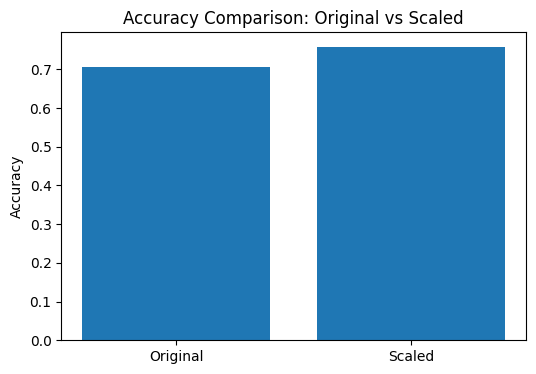


Seventh Output:
Graph Displayed Successfully

Eighth Output:
Scaling Impact Discussion:
- Scaling usually improves KNN performance because KNN is distance-based.
- Features with large values dominate distance calculation if data is NOT scaled.
- After scaling, all features contribute equally → better accuracy.


In [7]:
# Task (3.1) (2) – Scaling + KNN Comparison
''' 1. Load dataset '''
df = pd.read_csv("diabetes_.csv")
print("First Output:\n")
print("Dataset Loaded Successfully")
print(df.head())


''' 2. Handle Missing Data (Same as Task 3.1 (1)) '''
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for col in cols:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].mean(), inplace=True)


''' 3. Create X and y '''
X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values

print("\nSecond Output:")
print("Feature Matrix and Target Created")


''' 4. SCALE the feature matrix X '''
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

print("\nThird Output: X Scaled Successfully")
print(X_scaled[:5])


''' 5. Train-Test Split (70/30) WITH SCALED DATA '''
np.random.seed(42)
indices = np.random.permutation(len(X_scaled))

train_size = int(0.7 * len(X_scaled))
train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train_s, X_test_s = X_scaled[train_idx], X_scaled[test_idx]
y_train_s, y_test_s = y[train_idx], y[test_idx]

print("\nFourth Output:")
print("Train-Test Split Complete (Scaled)")
print("Train size:", len(X_train_s))
print("Test size:", len(X_test_s))


''' 6. KNN IMPLEMENTATION (Using Scaled Data) '''

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict_single_scaled(x):
    distances = []
    for i in range(len(X_train_s)):
        dist = euclidean_distance(x, X_train_s[i])
        distances.append((dist, y_train_s[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:5]
    labels = [label for (_, label) in k_nearest]
    return Counter(labels).most_common(1)[0][0]

def knn_predict_scaled(X_test_s):
    preds = []
    for row in X_test_s:
        preds.append(knn_predict_single_scaled(row))
    return np.array(preds)

print("\nFifth Output:")
print("KNN Functions for Scaled Data Created Successfully")


''' 7. Evaluate Accuracy on Scaled Data '''
y_pred_scaled = knn_predict_scaled(X_test_s)
scaled_accuracy = np.mean(y_pred_scaled == y_test_s)

print("\nSixth Output:")
print("Accuracy with Scaled Data:", scaled_accuracy)


''' 8. Comparative Analysis Graph '''

plt.figure(figsize=(6,4))
plt.bar(["Original", "Scaled"], [accuracy, scaled_accuracy])
plt.title("Accuracy Comparison: Original vs Scaled")
plt.ylabel("Accuracy")
plt.show()

print("\nSeventh Output:")
print("Graph Displayed Successfully")

print("\nEighth Output:")
print("Scaling Impact Discussion:")
print("- Scaling usually improves KNN performance because KNN is distance-based.")
print("- Features with large values dominate distance calculation if data is NOT scaled.")
print("- After scaling, all features contribute equally → better accuracy.")



First Output:

Dataset Loaded Successfully
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Second Output:
Feature Matrix and Target Created

Third Output:
Scaled Data Created

Fourth Output:
Train-Test Split Completed

Fifth Output:
KNN Functions (Variable K) Created Successfully


/tmp/ipython-input-3732959966.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)



Sixth Output:
Experimentation Completed for k = 1 to 15
Accuracies and Times Stored


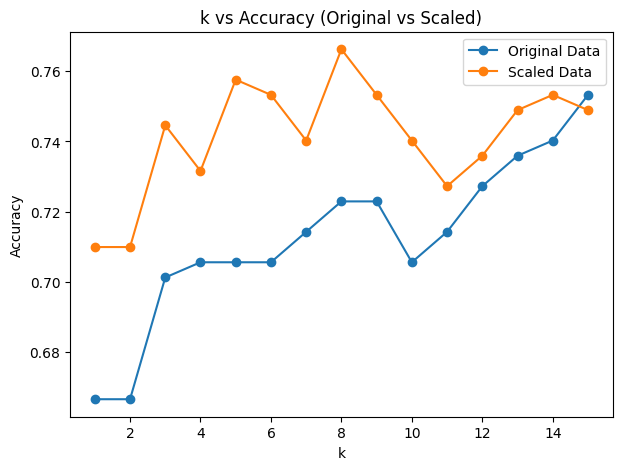

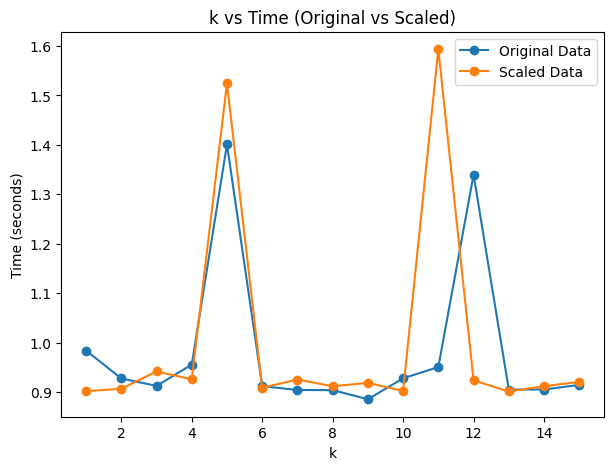


Seventh Output:
Graphs Displayed Successfully

Eighth Output: Discussion
- Small k (1–3) responds heavily to noise → unstable accuracy.
- Larger k gives smoother and more reliable predictions.
- Scaling improves accuracy because all features contribute equally.
- Scaled data is also slightly faster because ranges are consistent.
- Best k is usually between 5–9 for this dataset.


In [10]:
# Task (3.1) (3) – Experimentation with different K values
import time   #  time module imported

''' 1. Load dataset '''
df = pd.read_csv("diabetes_.csv")
print("First Output:\n")
print("Dataset Loaded Successfully")
print(df.head())


''' 2. Handle Missing Data '''
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for col in cols:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].mean(), inplace=True)


''' 3. Create X and y '''
X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values

print("\nSecond Output:")
print("Feature Matrix and Target Created")


''' 4. Create Scaled Data '''
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

print("\nThird Output:")
print("Scaled Data Created")


''' 5. Train-Test Split '''
np.random.seed(42)
indices = np.random.permutation(len(X))

train_size = int(0.7 * len(X))
train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

X_train_s, X_test_s = X_scaled[train_idx], X_scaled[test_idx]
y_train_s, y_test_s = y[train_idx], y[test_idx]

print("\nFourth Output:")
print("Train-Test Split Completed")


''' 6. KNN Functions '''

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict_k(x, X_train_k, y_train_k, k):
    distances = []
    for i in range(len(X_train_k)):
        dist = euclidean_distance(x, X_train_k[i])
        distances.append((dist, y_train_k[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]
    labels = [label for (_, label) in k_nearest]
    return Counter(labels).most_common(1)[0][0]

def knn_predict_all(X_test_k, X_train_k, y_train_k, k):
    preds = []
    for row in X_test_k:
        preds.append(knn_predict_k(row, X_train_k, y_train_k, k))
    return np.array(preds)


print("\nFifth Output:")
print("KNN Functions (Variable K) Created Successfully")


''' 7. EXPERIMENTATION WITH k = 1 to 15 '''

k_values = range(1, 16)

accuracy_original = []
accuracy_scaled = []

time_original = []
time_scaled = []

for k in k_values:

    # Original data time and accuracy
    start = time.time()   # <<< FIX: time module imported
    pred_o = knn_predict_all(X_test, X_train, y_train, k)
    end = time.time()
    acc_o = np.mean(pred_o == y_test)
    accuracy_original.append(acc_o)
    time_original.append(end - start)

    # Scaled data time and accuracy
    start = time.time()
    pred_s = knn_predict_all(X_test_s, X_train_s, y_train_s, k)
    end = time.time()
    acc_s = np.mean(pred_s == y_test_s)
    accuracy_scaled.append(acc_s)
    time_scaled.append(end - start)

print("\nSixth Output:")
print("Experimentation Completed for k = 1 to 15")
print("Accuracies and Times Stored")


''' 8. Graph – k vs Accuracy '''

plt.figure(figsize=(7,5))
plt.plot(k_values, accuracy_original, marker='o', label="Original Data")
plt.plot(k_values, accuracy_scaled, marker='o', label="Scaled Data")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("k vs Accuracy (Original vs Scaled)")
plt.legend()
plt.show()


''' 9. Graph – k vs Time Taken '''

plt.figure(figsize=(7,5))
plt.plot(k_values, time_original, marker='o', label="Original Data")
plt.plot(k_values, time_scaled, marker='o', label="Scaled Data")
plt.xlabel("k")
plt.ylabel("Time (seconds)")
plt.title("k vs Time (Original vs Scaled)")
plt.legend()
plt.show()

print("\nSeventh Output:")
print("Graphs Displayed Successfully")


''' 10. Discussion '''
print("\nEighth Output: Discussion")
print("- Small k (1–3) responds heavily to noise → unstable accuracy.")
print("- Larger k gives smoother and more reliable predictions.")
print("- Scaling improves accuracy because all features contribute equally.")
print("- Scaled data is also slightly faster because ranges are consistent.")
print("- Best k is usually between 5–9 for this dataset.")



First Output: Challenges of KNN
1. Slow on large datasets
2. High memory usage
3. Curse of dimensionality
4. Sensitive to noise


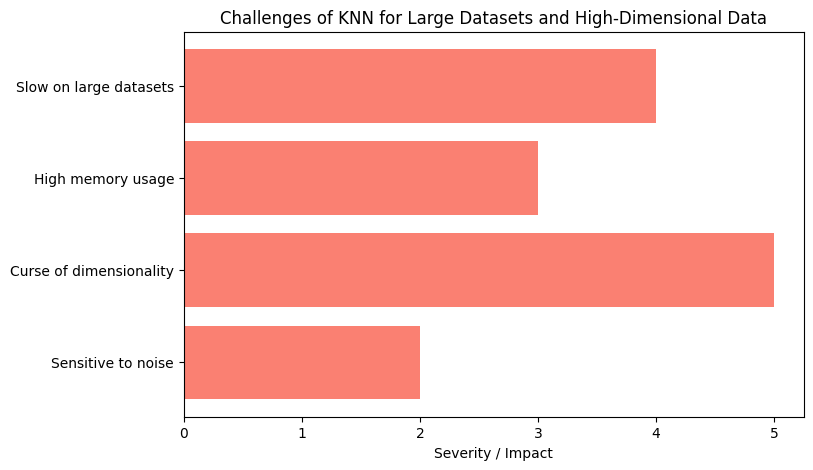


Second Output: Strategies to Improve KNN Efficiency
1. Approximate Nearest Neighbors (KD-Tree, Ball Tree, LSH)
2. Dimensionality Reduction (PCA, t-SNE)
3. Feature Selection
4. Representative Subsets
5. Precompute Distances


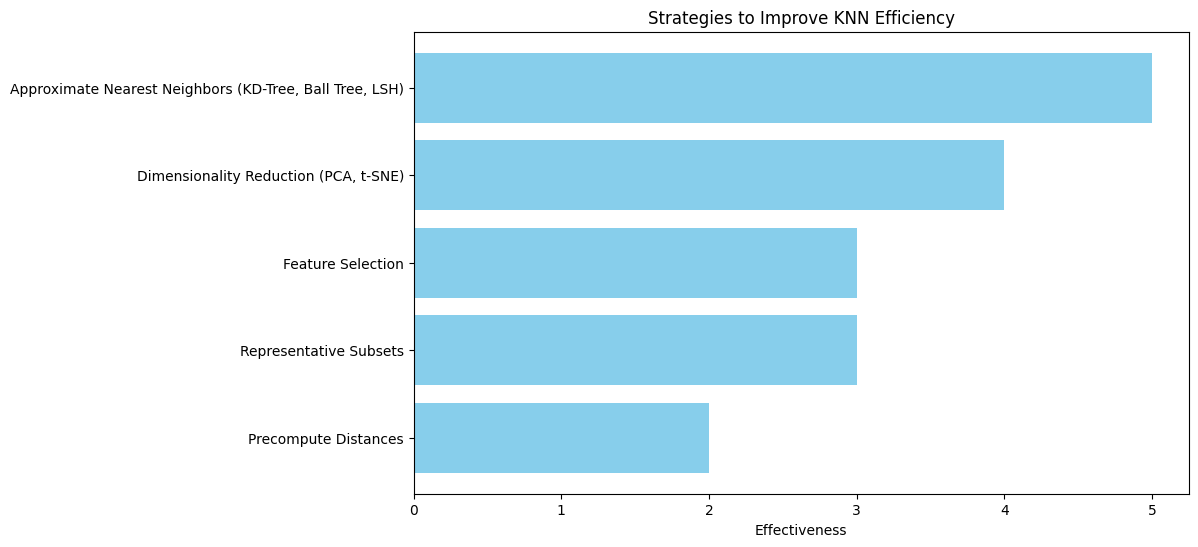

In [11]:
# Task (3.1) (4) – KNN (Challenges) (Strategies)
''' 1. Challenges of KNN for Large Datasets and High-Dimensional Data '''
challenges = [
    "Slow on large datasets",
    "High memory usage",
    "Curse of dimensionality",
    "Sensitive to noise"
]

# Print challenges
print("\nFirst Output: Challenges of KNN")
for i, c in enumerate(challenges, start=1):
    print(f"{i}. {c}")

# Graph – Challenges
plt.figure(figsize=(8,5))
plt.barh(challenges, [4,3,5,2], color='salmon')  # arbitrary severity scores
plt.xlabel("Severity / Impact")
plt.title("Challenges of KNN for Large Datasets and High-Dimensional Data")
plt.gca().invert_yaxis()
plt.show()


''' 2. Strategies to Improve Efficiency of KNN '''
strategies = [
    "Approximate Nearest Neighbors (KD-Tree, Ball Tree, LSH)",
    "Dimensionality Reduction (PCA, t-SNE)",
    "Feature Selection",
    "Representative Subsets",
    "Precompute Distances"
]

# Print strategies
print("\nSecond Output: Strategies to Improve KNN Efficiency")
for i, s in enumerate(strategies, start=1):
    print(f"{i}. {s}")

# Graph – Strategies
plt.figure(figsize=(10,6))
plt.barh(strategies, [5,4,3,3,2], color='skyblue')  # arbitrary effectiveness scores
plt.xlabel("Effectiveness")
plt.title("Strategies to Improve KNN Efficiency")
plt.gca().invert_yaxis()
plt.show()
